# <p style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">TOP 250 ANIME 2023 EDA</p>


<img src ="anime_photo.jpg" style="width:400px;height:300px">

<a id="2"></a>
# <p style="padding:10px;background-color:SkyBlue;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:100">Import Packages</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dython import nominal
from wordcloud import WordCloud
import warnings 
warnings.filterwarnings("ignore")

<a id="2"></a>
# <p style="padding:10px;background-color:SkyBlue;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:100">Loading and reading Dataset</p>

In [2]:
df = pd.read_csv(r"D:\\Project_data\top250_anime.csv")

In [3]:
df.head()

,Rank,Title,Popularity,Genre,Studio,Type,Episodes,Duration,Start_date,End_date,Members,Score
0,1,Shingeki no Kyojin: The Final Season - Kankets...,609,"Action, Drama, Suspense",MAPPA,Special,2.0,61,23-Mar,2023,347875.0,9.17
1,2,Fullmetal Alchemist: Brotherhood,3,"Action, Adventure, Drama, Fantasy",Bones,TV,64.0,24,9-Apr,10-Jul,3109951.0,9.11
2,3,Bleach: Sennen Kessen-hen,508,"Action, Adventure, Fantasy",Pierrot,TV,13.0,24,22-Oct,22-Dec,404036.0,9.09
3,4,Steins;Gate,13,"Drama, Sci-Fi, Suspense",White Fox,TV,24.0,24,11-Apr,11-Sep,2393767.0,9.08
4,5,Gintama°,335,"Action, Comedy, Sci-Fi",Bandai Namco Pictures,TV,51.0,24,15-Apr,16-Mar,581994.0,9.07


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        250 non-null    int64  
 1   Title       250 non-null    object 
 2   Popularity  250 non-null    int64  
 3   Genre       249 non-null    object 
 4   Studio      248 non-null    object 
 5   Type        250 non-null    object 
 6   Episodes    249 non-null    float64
 7   Duration    250 non-null    int64  
 8   Start_date  250 non-null    object 
 9   End_date    248 non-null    object 
 10  Members     248 non-null    float64
 11  Score       250 non-null    float64
dtypes: float64(3), int64(3), object(6)
memory usage: 23.6+ KB


In [5]:
df.isnull().sum()

Rank          0
Title         0
Popularity    0
Genre         1
Studio        2
Type          0
Episodes      1
Duration      0
Start_date    0
End_date      2
Members       2
Score         0
dtype: int64

<a id="2"></a>
# <p style="padding:10px;background-color:SkyBlue;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:100">Data cleaning</p>

In [6]:
df.drop(['Start_date','End_date'],axis=1 , inplace=True)

In [7]:
df.Genre = df.Genre.fillna("Music")
df.Episodes = df.Episodes.fillna(1055.0)
df.Members = df.Members.fillna(df.Members.mean())
values = {"Studio" : "self" }
df.fillna(value=values , limit=1 ,axis='index', inplace= True)
values1 = {"Studio" : "yuraki" }
df.fillna(value=values1 , axis='index', inplace= True)

In [8]:
df.isnull().sum()

Rank          0
Title         0
Popularity    0
Genre         0
Studio        0
Type          0
Episodes      0
Duration      0
Members       0
Score         0
dtype: int64

<a id="2"></a>
# <p style="padding:10px;background-color:SkyBlue;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:100">Exploratory Data Analysis (EDA)</p>

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,250.0,125.500000,72.312977,1.00,63.25,125.500,187.75,250.00
Popularity,250.0,855.460000,1009.330929,1.00,178.25,490.000,1139.00,5794.00
Episodes,250.0,21.940000,69.830894,1.00,1.00,12.000,24.00,1055.00
Duration,250.0,41.720000,35.677178,3.00,23.00,24.000,29.00,161.00
Members,250.0,664259.217742,682025.230694,10566.00,191414.50,419686.500,858533.75,3673536.00
Score,250.0,8.546680,0.206665,8.29,8.38,8.505,8.66,9.17


In [10]:
headers = [ 'Rank','Title', 'Genre', 'Studio' , 'Episodes', 'Score']
anime = df.sort_values('Score', ascending=False)
table =anime.head(10)[[ 'Rank','Title', 'Genre', 'Studio' , 'Episodes', 'Score']]
print("\n Top 10 most score anime ")

anime.head(10).style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})


 Top 10 most score anime 


,Rank,Title,Popularity,Genre,Studio,Type,Episodes,Duration,Members,Score
0,1,Shingeki no Kyojin: The Final Season - Kanketsu-hen,609,"Action, Drama, Suspense",MAPPA,Special,2.000000,61,347875.000000,9.170000
1,2,Fullmetal Alchemist: Brotherhood,3,"Action, Adventure, Drama, Fantasy",Bones,TV,64.000000,24,3109951.000000,9.110000
2,3,Bleach: Sennen Kessen-hen,508,"Action, Adventure, Fantasy",Pierrot,TV,13.000000,24,404036.000000,9.090000
3,4,Steins;Gate,13,"Drama, Sci-Fi, Suspense",White Fox,TV,24.000000,24,2393767.000000,9.080000
4,5,Gintama°,335,"Action, Comedy, Sci-Fi",Bandai Namco Pictures,TV,51.000000,24,581994.000000,9.070000
5,6,Kaguya-sama wa Kokurasetai: Ultra Romantic,221,"Comedy, Romance",A-1 Pictures,TV,13.000000,23,772019.000000,9.060000
6,7,Shingeki no Kyojin Season 3 Part 2,26,"Action, Drama",Wit Studio,TV,10.000000,23,2045115.000000,9.060000
7,8,Gintama: The Final,1581,"Action, Comedy, Drama, Sci-Fi",Bandai Namco Pictures,Movie,1.000000,104,126411.000000,9.050000
9,10,Hunter x Hunter (2011),10,"Action, Adventure, Fantasy",Madhouse,TV,148.000000,23,2596435.000000,9.040000
8,9,Gintama',385,"Action, Comedy, Sci-Fi",Sunrise,TV,51.000000,24,513321.000000,9.040000


In [11]:
headers = [ 'Episodes', 'Rank','Title', 'Genre', 'Studio' , 'Score']
anime = df.sort_values('Episodes', ascending=False)
table =anime.head(10)[['Episodes', 'Rank','Title', 'Genre', 'Studio' ,  'Score']]
print("\n Top 10 most Episodes anime ")

anime.head(10).style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})


 Top 10 most Episodes anime 


,Rank,Title,Popularity,Genre,Studio,Type,Episodes,Duration,Members,Score
57,58,One Piece,21,"Action, Adventure, Fantasy",Toei Animation,TV,1055.000000,24,2111259.000000,8.680000
17,18,Gintama,138,"Action, Comedy, Sci-Fi",Sunrise,TV,201.000000,24,1006869.000000,8.940000
9,10,Hunter x Hunter (2011),10,"Action, Adventure, Fantasy",Madhouse,TV,148.000000,23,2596435.000000,9.040000
163,164,Saiki Kusuo no Ψ-nan,136,"Comedy, Supernatural","J.C.Staff, Egg Firm",TV,120.000000,5,1011926.000000,8.420000
143,144,Yuu☆Yuu☆Hakusho,289,"Action, Comedy, Supernatural",Pierrot,TV,112.000000,24,643141.000000,8.450000
10,11,Ginga Eiyuu Densetsu,724,"Drama, Sci-Fi","K-Factory, Kitty Film Mitaka Studio",OVA,110.000000,26,299874.000000,9.030000
105,106,Slam Dunk,791,Sports,Toei Animation,TV,101.000000,23,277078.000000,8.540000
127,128,Uchuu Kyoudai,1159,"Comedy, Sci-Fi",A-1 Pictures,TV,99.000000,24,184621.000000,8.500000
249,250,Ashita no Joe,2112,"Drama, Sports",Mushi Production,TV,79.000000,25,83604.000000,8.290000
39,40,Hajime no Ippo,369,Sports,Madhouse,TV,75.000000,23,531069.000000,8.750000


In [12]:
headers = [ 'Rank','Title', 'Genre', 'Studio' , 'Episodes', 'Score']
anime = df.sort_values('Rank', ascending=True)
table =anime.head(10)[[ 'Rank','Title', 'Genre', 'Studio' , 'Episodes', 'Score']]
print("\n Top 10 most Rank anime " ) 

anime.head(10).style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})


 Top 10 most Rank anime 


,Rank,Title,Popularity,Genre,Studio,Type,Episodes,Duration,Members,Score
0,1,Shingeki no Kyojin: The Final Season - Kanketsu-hen,609,"Action, Drama, Suspense",MAPPA,Special,2.000000,61,347875.000000,9.170000
1,2,Fullmetal Alchemist: Brotherhood,3,"Action, Adventure, Drama, Fantasy",Bones,TV,64.000000,24,3109951.000000,9.110000
2,3,Bleach: Sennen Kessen-hen,508,"Action, Adventure, Fantasy",Pierrot,TV,13.000000,24,404036.000000,9.090000
3,4,Steins;Gate,13,"Drama, Sci-Fi, Suspense",White Fox,TV,24.000000,24,2393767.000000,9.080000
4,5,Gintama°,335,"Action, Comedy, Sci-Fi",Bandai Namco Pictures,TV,51.000000,24,581994.000000,9.070000
5,6,Kaguya-sama wa Kokurasetai: Ultra Romantic,221,"Comedy, Romance",A-1 Pictures,TV,13.000000,23,772019.000000,9.060000
6,7,Shingeki no Kyojin Season 3 Part 2,26,"Action, Drama",Wit Studio,TV,10.000000,23,2045115.000000,9.060000
7,8,Gintama: The Final,1581,"Action, Comedy, Drama, Sci-Fi",Bandai Namco Pictures,Movie,1.000000,104,126411.000000,9.050000
8,9,Gintama',385,"Action, Comedy, Sci-Fi",Sunrise,TV,51.000000,24,513321.000000,9.040000
9,10,Hunter x Hunter (2011),10,"Action, Adventure, Fantasy",Madhouse,TV,148.000000,23,2596435.000000,9.040000


<a id="2"></a>
# <p style="padding:10px;background-color:SkyBlue;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:100">Correlation</p>

Text(0.5, 1.0, 'Correlation between features')

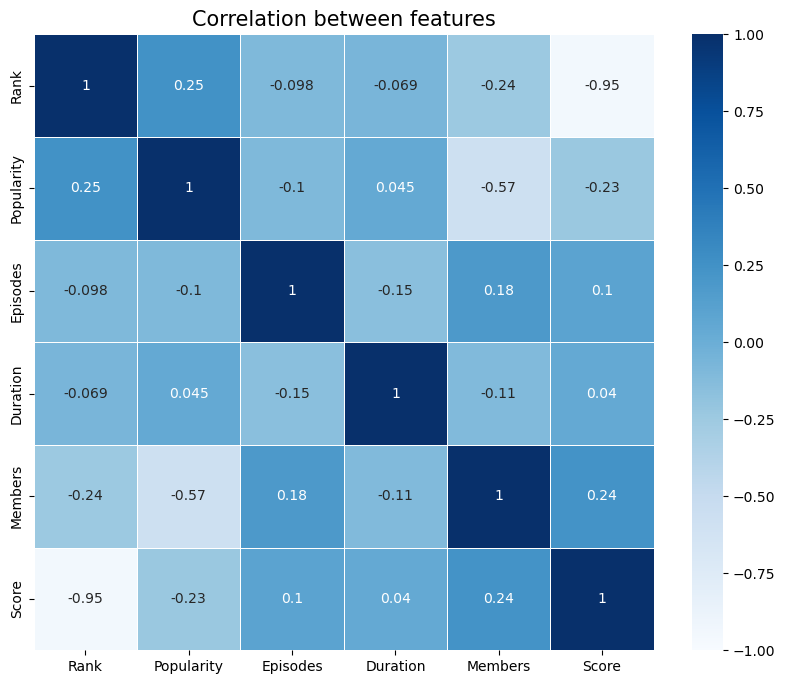

In [13]:
plt.figure(figsize= (10,8))
sns.heatmap(df.corr(),
            annot = True,
            vmin = -1,
            vmax = 1,
            linewidths=0.5,
            cmap = "Blues")
plt.title("Correlation between features", fontsize = 15)

In [14]:
df1 =df.drop(['Title'], axis=1)

<Figure size 1000x800 with 0 Axes>

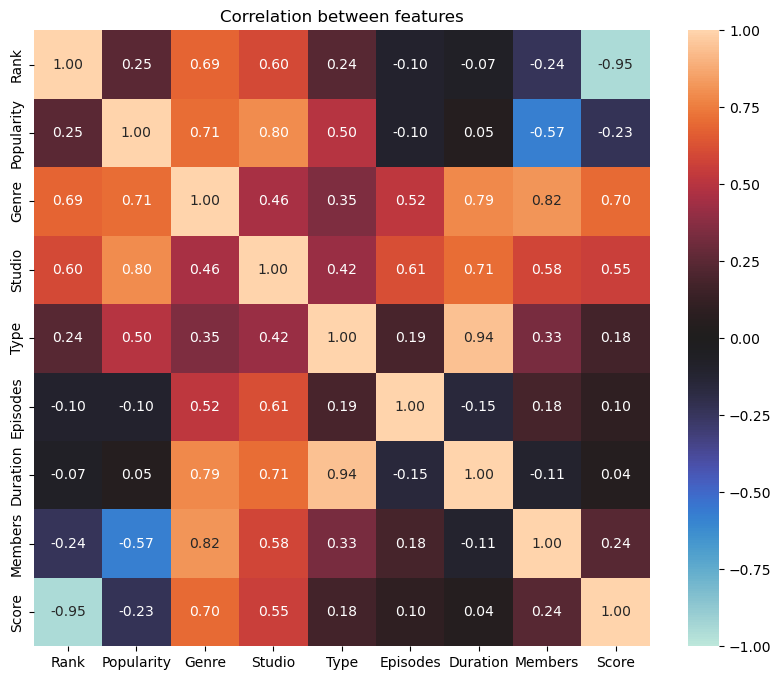

In [15]:
plt.figure(figsize= (10,8))
nominal.associations(df1, nominal_columns=['Genre', 'Studio', 'Type']  , figsize=(10,8),
                     title=("Correlation between features"));

<a id="2"></a>
# <p style="padding:10px;background-color:SkyBlue;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:100">Top Anime popularity</p>

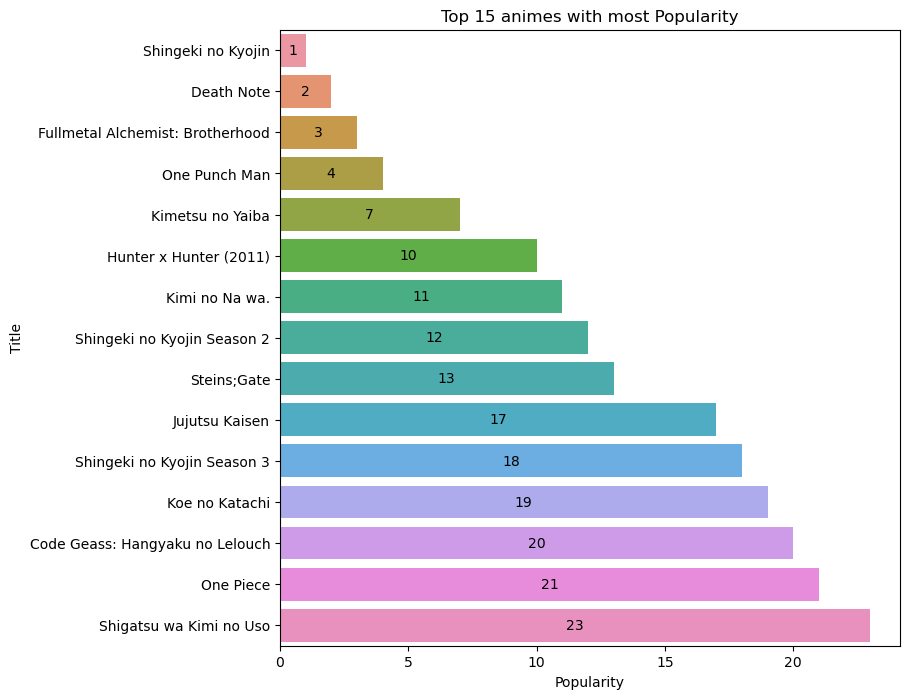

In [16]:
column_list = [ "Popularity"] 
plt.figure(figsize=(8,8))
for i, col in enumerate(column_list):
    ax = sns.barplot(data=df.sort_values(by=col,ascending=True).head(15), x=col, y="Title")
    ax.bar_label(ax.containers[0], label_type="center")
    plt.title(f"Top 15 animes with most {col}")
plt.show();

* **Shingeki no Kyojin** wears the crown for highest Popularity followed by **Death Note** and **Fullmetal Alchemist: Brotherhood**


<a id="2"></a>
# <p style="padding:10px;background-color:SkyBlue;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:100">Anime genre</p>

In [17]:
top_anime = df[["Genre"]]
top_anime["Genre"] = top_anime["Genre"].str.split(", | , | ,")
top_anime = top_anime.explode("Genre")
top_anime["Genre"] = top_anime["Genre"].str.title()

print(f'Total unique genres are {len(top_anime["Genre"].unique())}')
top_anime["Genre"].value_counts().to_frame().T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Total unique genres are 22


,Drama,Action,Fantasy,Supernatural,Comedy,Adventure,Sci-Fi,Mystery,Romance,Award Winning,Slice Of Life,Suspense,Sports,Horror,Avant Garde,Music,Ecchi,Psychological,"Drama, Suspense",Action,"Drama, Sports",Boys Love
Genre,107,101,60,59,57,47,46,38,33,27,27,22,22,5,3,3,2,1,1,1,1,1


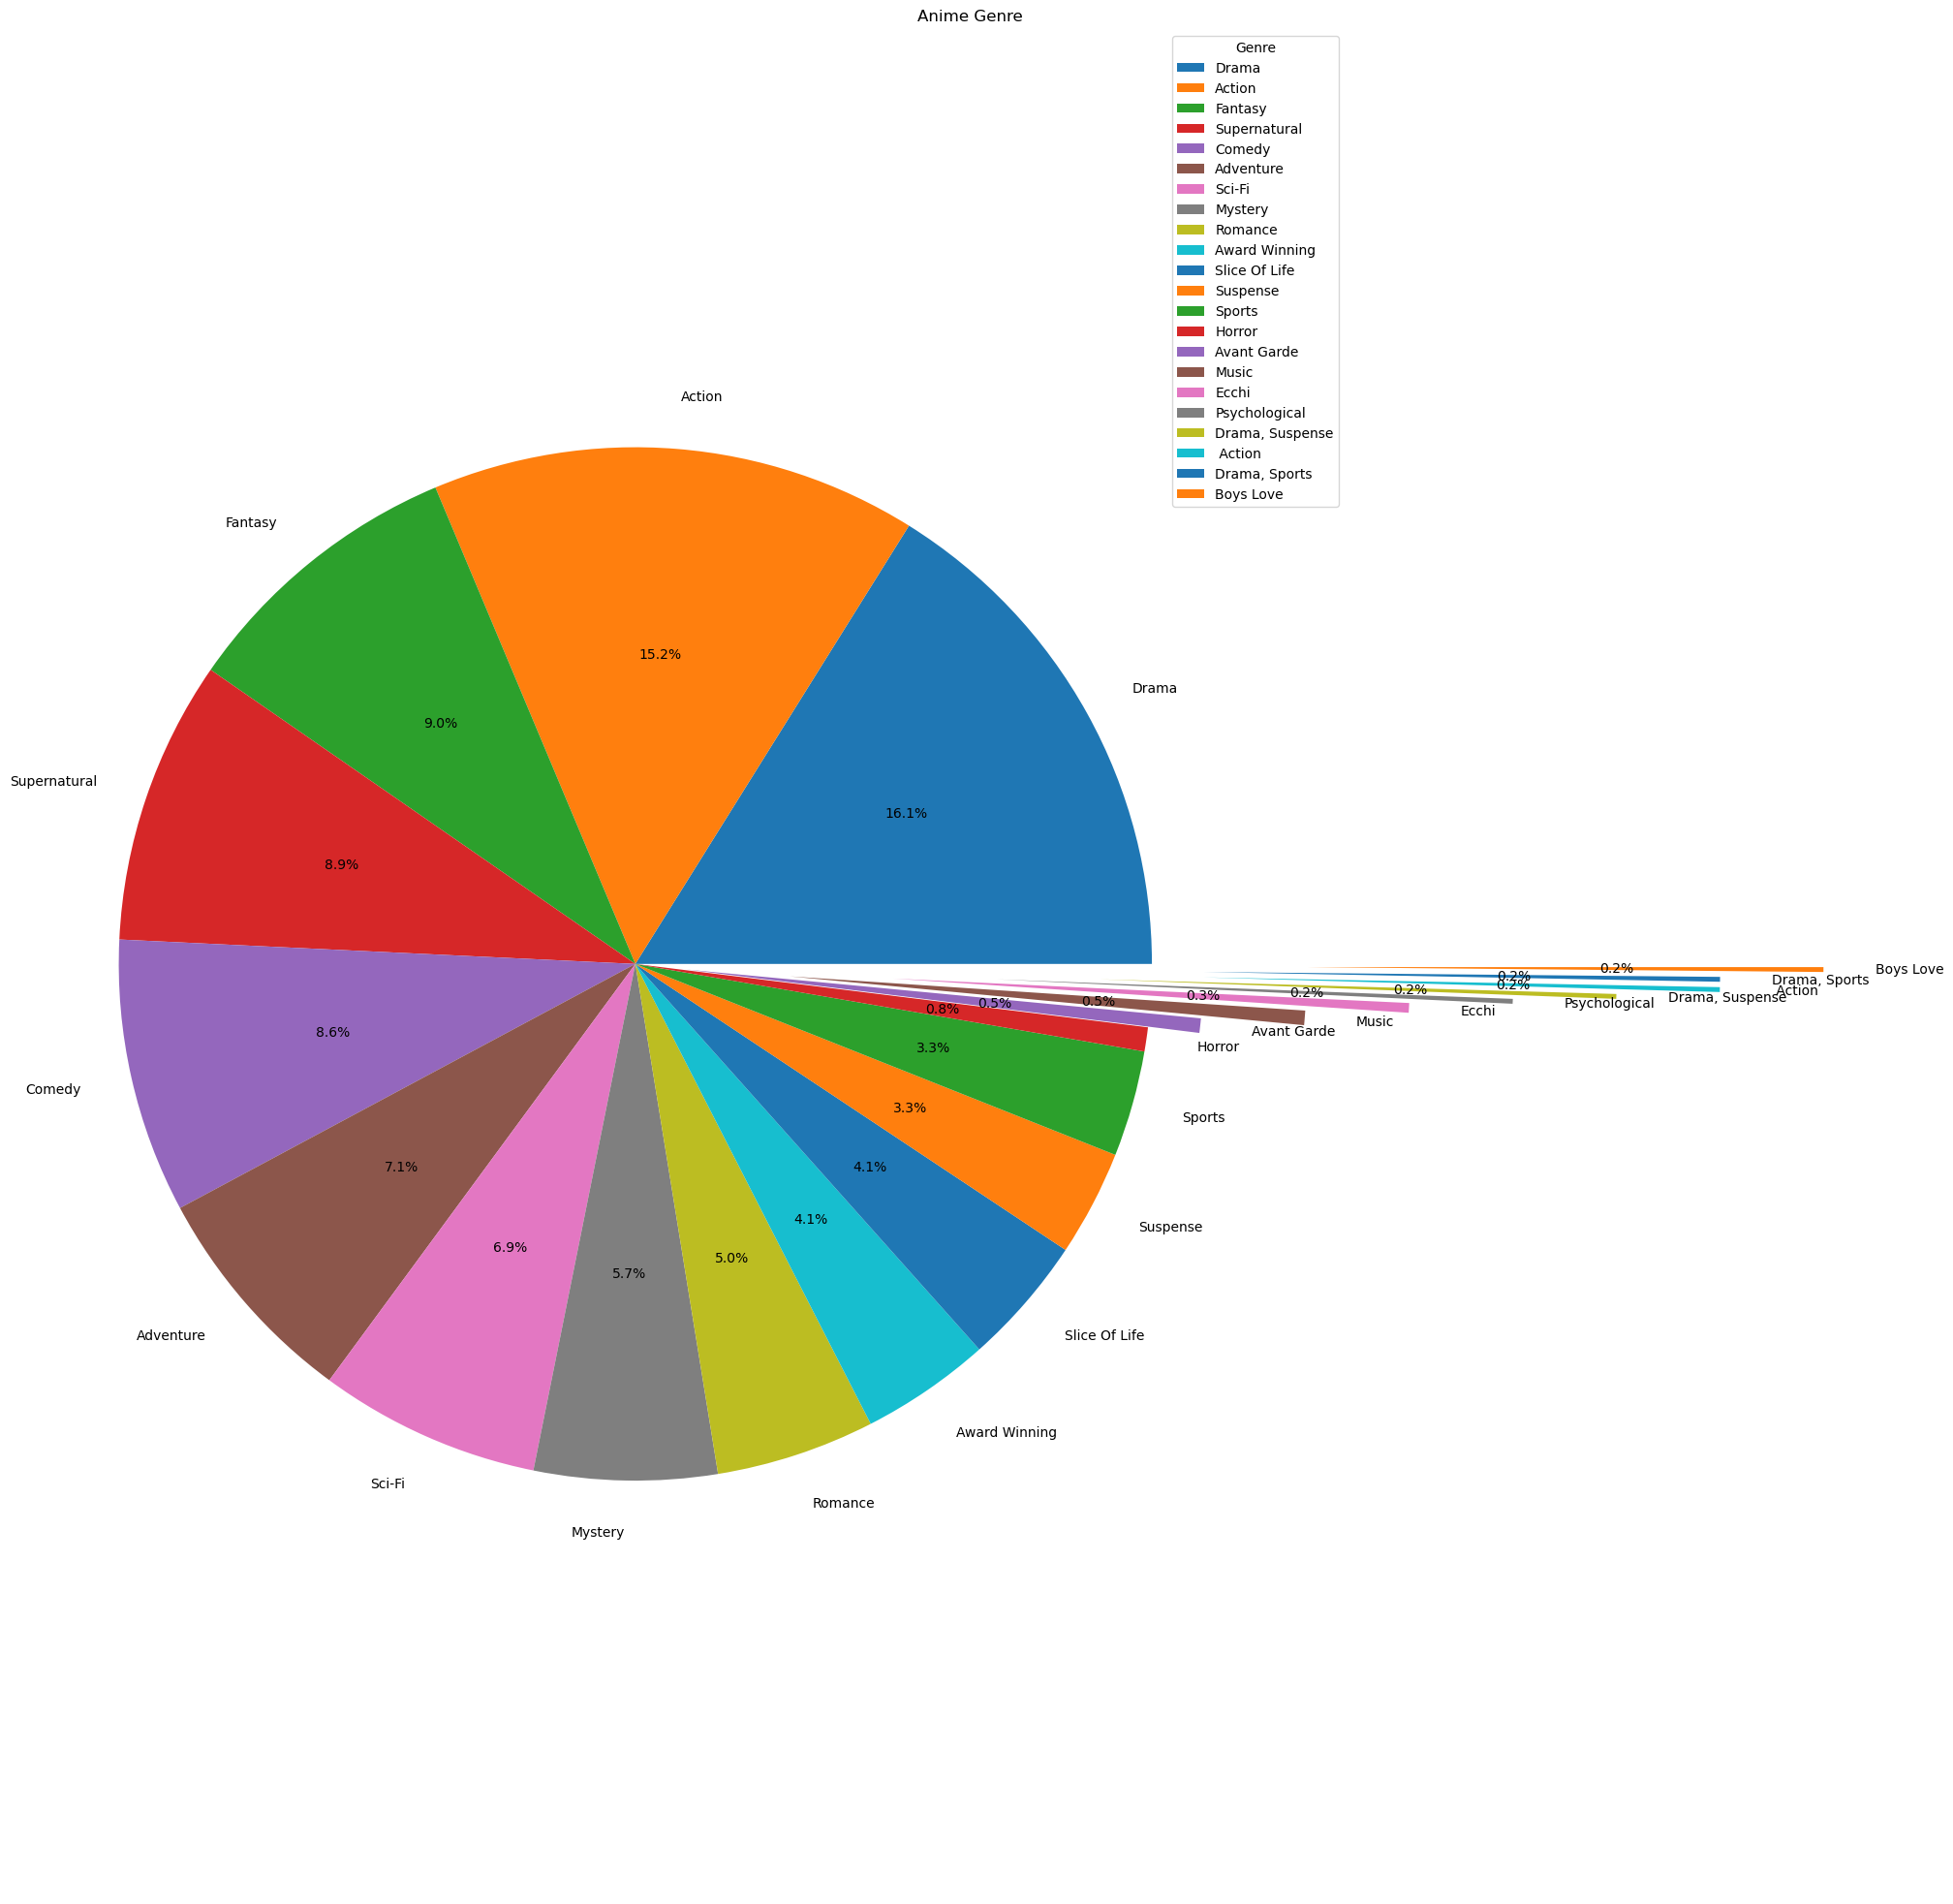

In [18]:
fig = plt.figure(figsize=(25,25))
type_counts = top_anime['Genre'].value_counts().to_dict()
explode1 = (0, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0.1,0.3,0.5,0.7,0.9,1.1,1.1,1.3)
plt.pie(type_counts.values(), labels=type_counts.keys(),  autopct='%1.1f%%' ,  explode=explode1)

plt.title('Anime Genre')
plt.axis('equal')

plt.legend(title='Genre', bbox_to_anchor=(0.7, 1))

plt.show()

let's explore how genre's wordcloud looks like



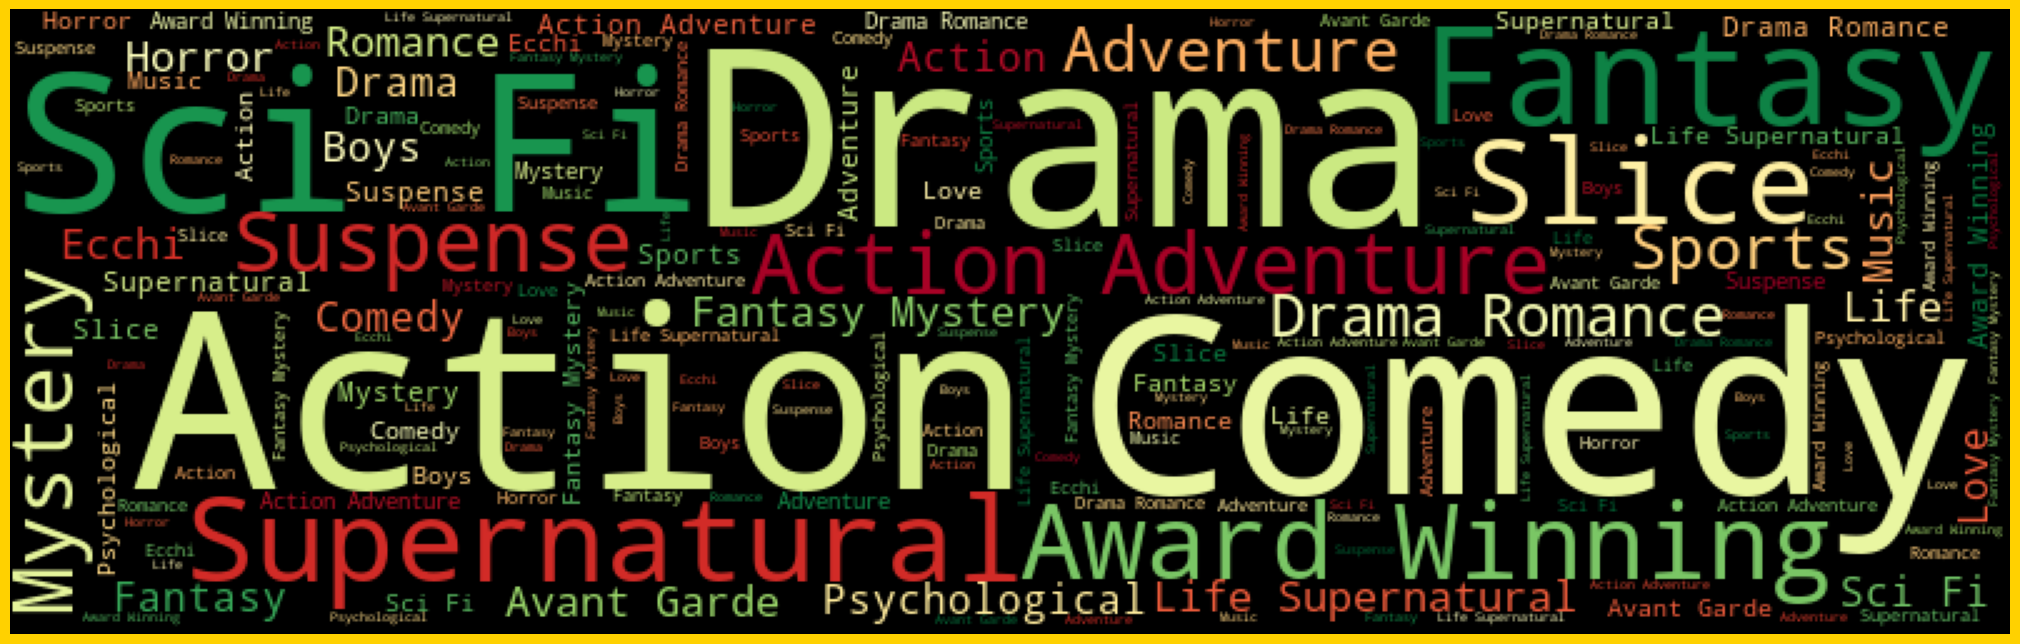

In [19]:
wordcloud = WordCloud(width = 800, height = 250, background_color ="black",colormap ="RdYlGn",
                      max_font_size=100, stopwords =None,repeat= True).generate(top_anime["Genre"].str.cat(sep=", | , | ,"))

print("let's explore how genre's wordcloud looks like\n")
plt.figure(figsize = (20, 8),facecolor = "#ffd100") 
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x = 0, y = 0)
plt.tight_layout(pad = 0) 
plt.show()

* Most of the people like  **Drama and Action** anime

<a id="2"></a>
# <p style="padding:10px;background-color:SkyBlue;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:100">Top Anime studio</p>

In [20]:
print("Anime Studio :")
df["Studio"].value_counts().to_frame().T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Anime Studio :


,Madhouse,Shaft,Sunrise,Kyoto Animation,Production I.G,ufotable,A-1 Pictures,Bones,Wit Studio,Bandai Namco Pictures,MAPPA,Brain's Base,Artland,TMS Entertainment,White Fox,Kinema Citrus,Shuka,Pierrot,David Production,Studio Ghibli,SynergySP,Studio Deen,Nippon Animation,Toei Animation,CoMix Wave Films,J.C.Staff,B.CMAY PICTURES,CloverWorks,8bit,"J.C.Staff, Egg Firm",Haoliners Animation League,Lerche,Khara,C-Station,Shin-Ei Animation,OLM,"Pierrot, Studio Signpost",Studio Bind,Gainax,"Wit Studio, CloverWorks",Tokyo Movie Shinsha,"Gainax, Tatsunoko Production",SILVER LINK.,Sentai Filmworks,Nexus,Topcraft,self,"Madhouse, Satelight, Graphinica","Brain's Base, Marvy Jack","Xebec, AIC",P.A. Works,"Gallop, Studio Comet",yuraki,"Production I.G, Trans Arts",TROYCA,Gonzo,"Tezuka Productions, MAPPA","Production I.G, Madhouse","K-Factory, Kitty Film Mitaka Studio","Madhouse, MAPPA",Orange,Studio Chizu,Trigger,Tatsunoko Production,Studio VOLN,"Gainax, Production I.G","Bandai Entertainment, Manga Entertainment",Manglobe,"OLM, P.I.C.S.",Hal Film Maker,Geno Studio,Aniplex,"Toei Animation, DandeLion Animation Studio",Zero-G,Platinum Vision,Sharefun Studio,Studio LAN,Mushi Production
Studio,15,13,11,11,10,10,10,9,8,8,8,7,6,6,6,6,5,5,4,4,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


<a id="2"></a>
# <p style="padding:10px;background-color:SkyBlue;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:100">Anime Category</p>

In [21]:
print("Anime Categories :")
df["Type"].value_counts().to_frame().T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Anime Categories :


,TV,Movie,OVA,ONA,Special,Music
Type,163,54,10,10,9,4


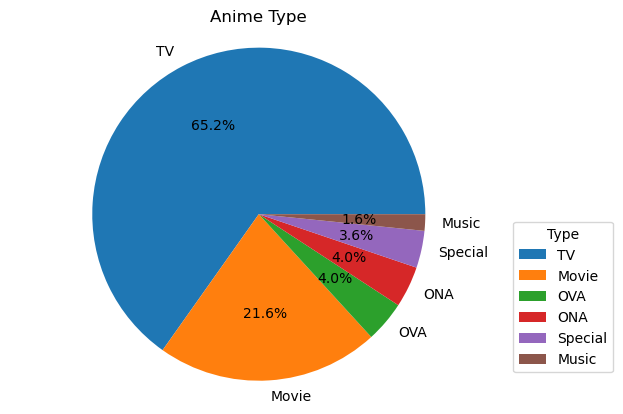

In [22]:

type_counts = df['Type'].value_counts().to_dict()

plt.pie(type_counts.values(), labels=type_counts.keys(),  autopct='%1.1f%%' )
plt.title('Anime Type')
plt.axis('equal')

plt.legend(title='Type', bbox_to_anchor=(1, 0.5))

plt.show()

Most of the animes are aired on TV which is 65.2% of total animes

<a id="2"></a>
# <p style="padding:10px;background-color:SkyBlue;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:100">Anime Episodes</p>

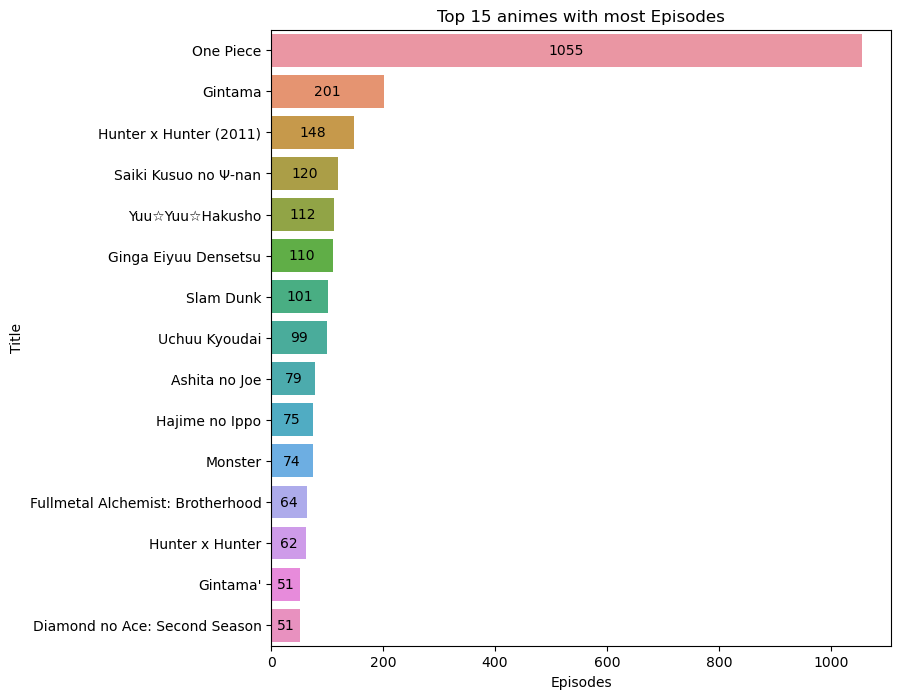

In [23]:
column_list = ["Episodes" ]
plt.figure(figsize=(8,8))
for i, col in enumerate(column_list):
    ax = sns.barplot(data=df.sort_values(by=col,ascending=False).head(15), x=col, y="Title" )
    ax.bar_label(ax.containers[0], label_type="center")
    plt.title(f"Top 15 animes with most {col}")
plt.show();

* **One Piece** wears the crown for most episodes followed by **Gintama** and **Hunter x Hunter (2011)**


<a id="2"></a>
# <p style="padding:10px;background-color:SkyBlue;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:100">Anime Duration</p>

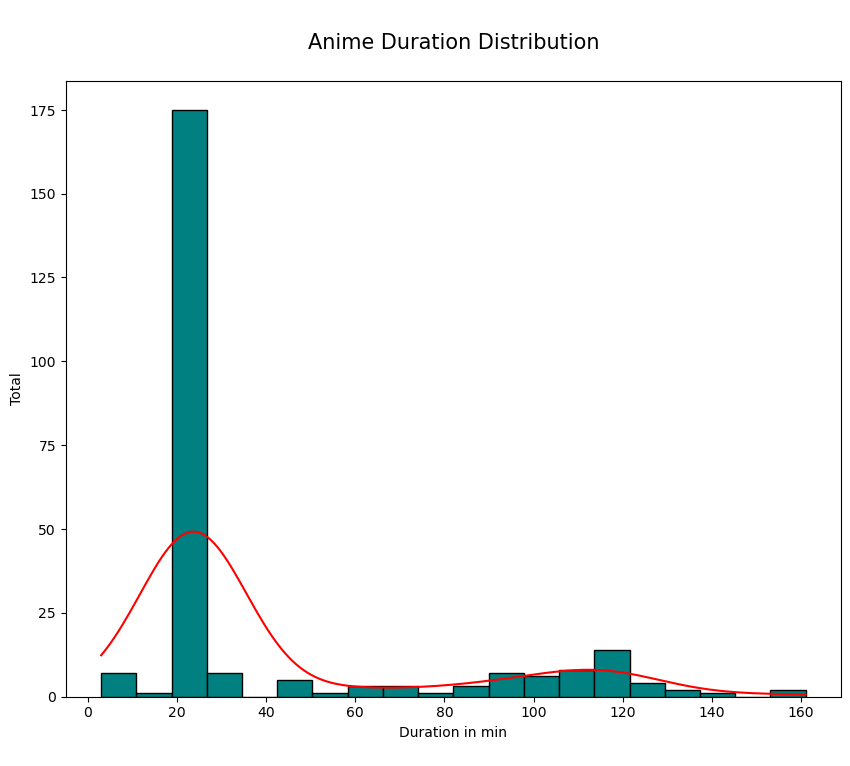

In [24]:
top_anime = df.sort_values(["Duration"],ascending=False)
plt.subplots(1,1,figsize=(10,8))

ax = sns.histplot(top_anime["Duration"],color="Teal",bins=20,alpha=1,edgecolor='black' , kde=True )
ax.lines[0].set_color('red')
plt.title("\nAnime Duration Distribution\n",fontsize = 15)
plt.xlabel("Duration in min\n", fontsize = 10)
plt.ylabel("Total", fontsize = 10)
plt.show()

* Most of the anime episodes duration(in min) is**20 to 24**
* Highest duration is **Movies** category anime
* This distribution are right skewed

<a id="2"></a>
# <p style="padding:10px;background-color:SkyBlue;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:100">Top Anime Community</p>

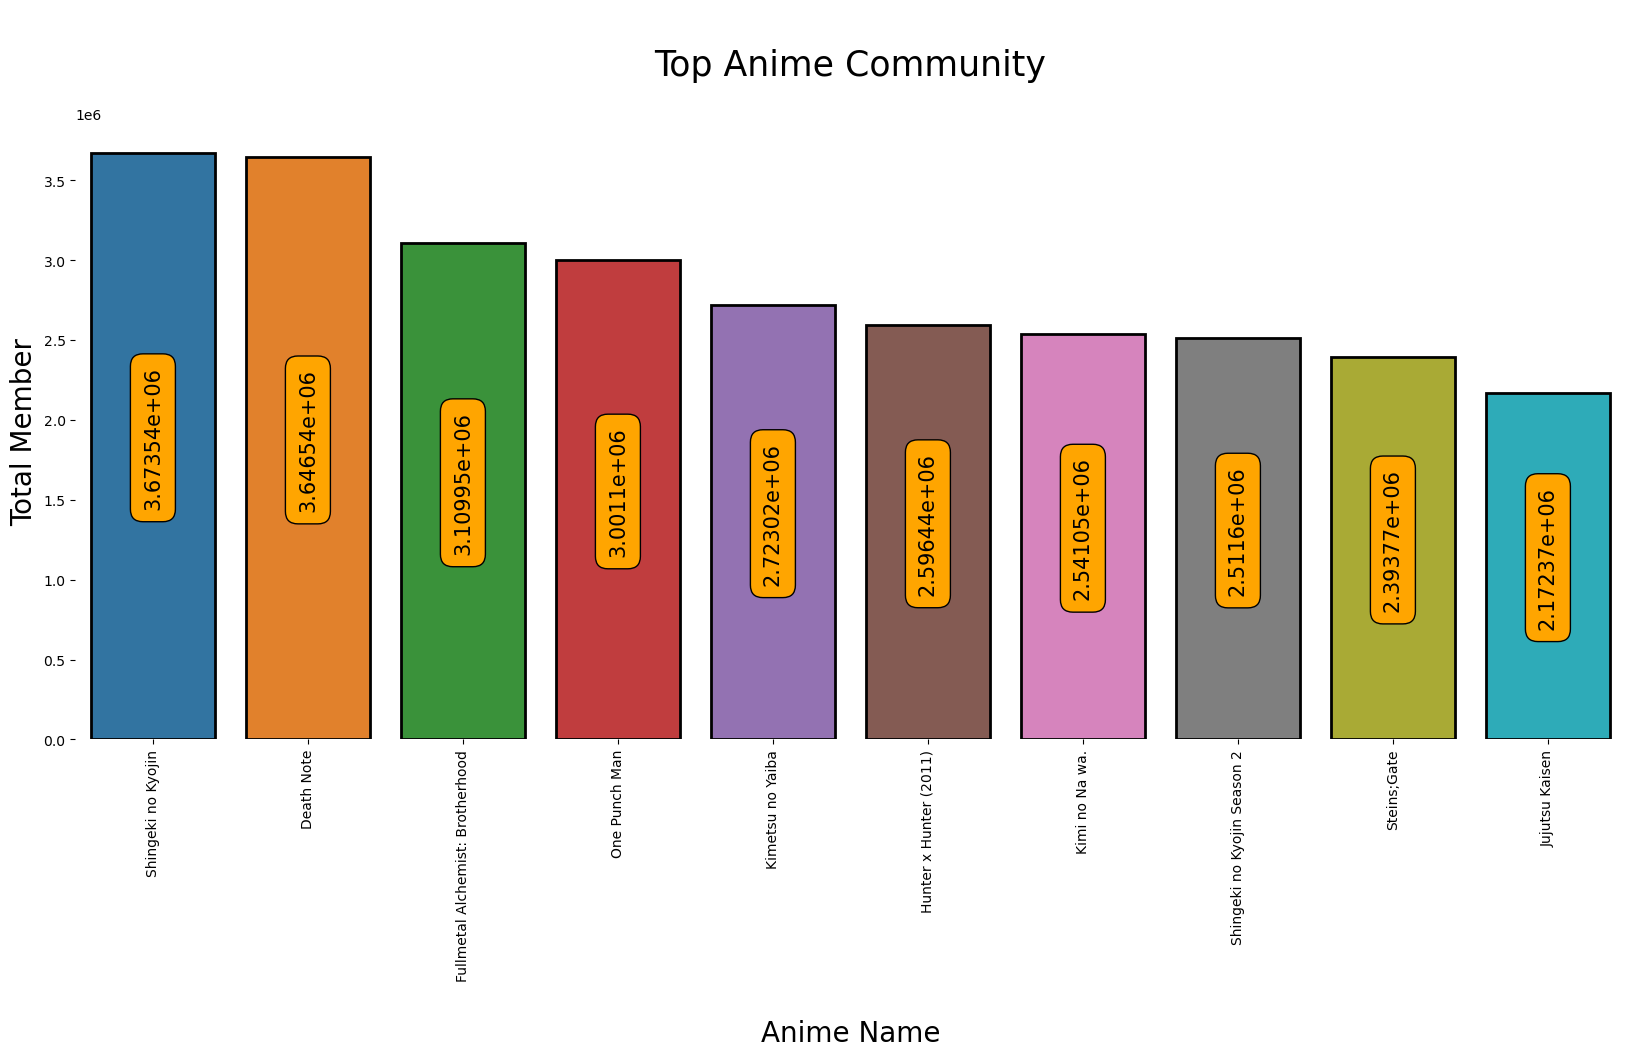

In [25]:
top_anime = df.sort_values(["Members"],ascending=False)

plt.subplots(figsize=(20,8))
p = sns.barplot(x=top_anime["Title"][:10],y=top_anime["Members"], edgecolor = "black", linewidth = 2)
p.axes.set_title("\nTop Anime Community\n", fontsize=25)
plt.ylabel("Total Member" , fontsize = 20)
plt.xlabel("\nAnime Name" , fontsize = 20)

plt.xticks(rotation = 90)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 6,size = 15,color = "black",rotation = 90,
    bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "orange", "edgecolor": "black", "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

* **Shingeki no Kyojin** wears the crown for highest community members followed by **Death Note** and **Fullmetal Alchemist: Brotherhood**


<a id="2"></a>
# <p style="padding:10px;background-color:SkyBlue;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:100">Top Anime Score</p>

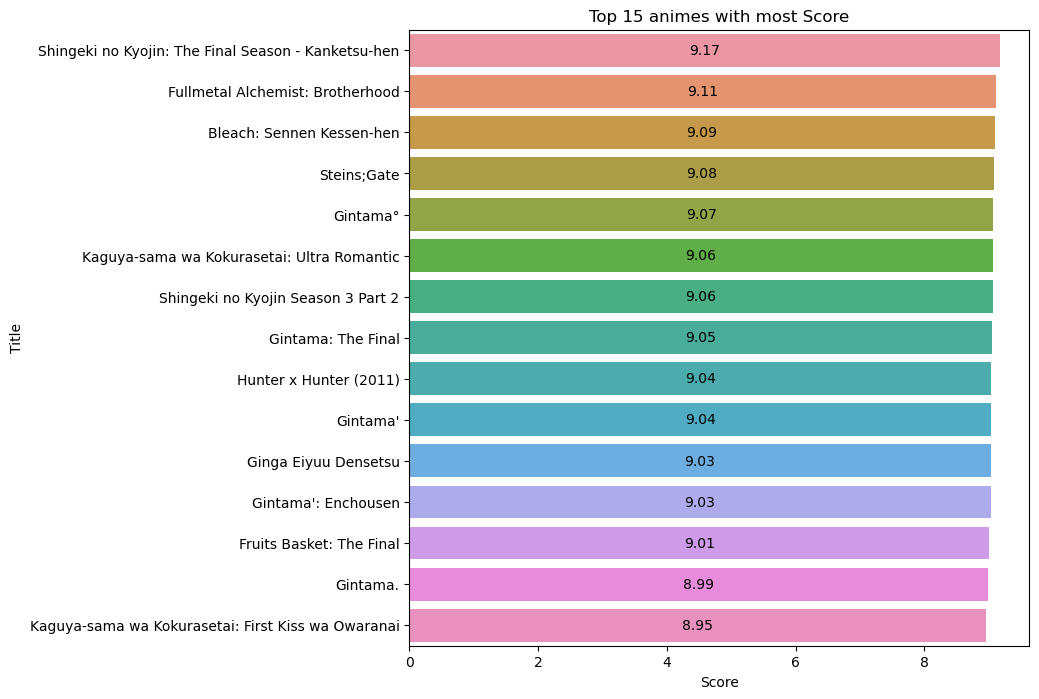

In [26]:
column_list = ["Score" ]
plt.figure(figsize=(8,8))
for i, col in enumerate(column_list):
    ax = sns.barplot(data=df.sort_values(by=col,ascending=False).head(15), x=col, y="Title" )
    ax.bar_label(ax.containers[0], label_type="center")
    plt.title(f"Top 15 animes with most {col}")
plt.show();

* **Shingeki no Kyojin: The Final Season - Kanketsu-hen** wears the crown for highest score followed by **Fullmetal Alchemist: Brotherhood** and **Bleach: Sennen Kessen-hen**


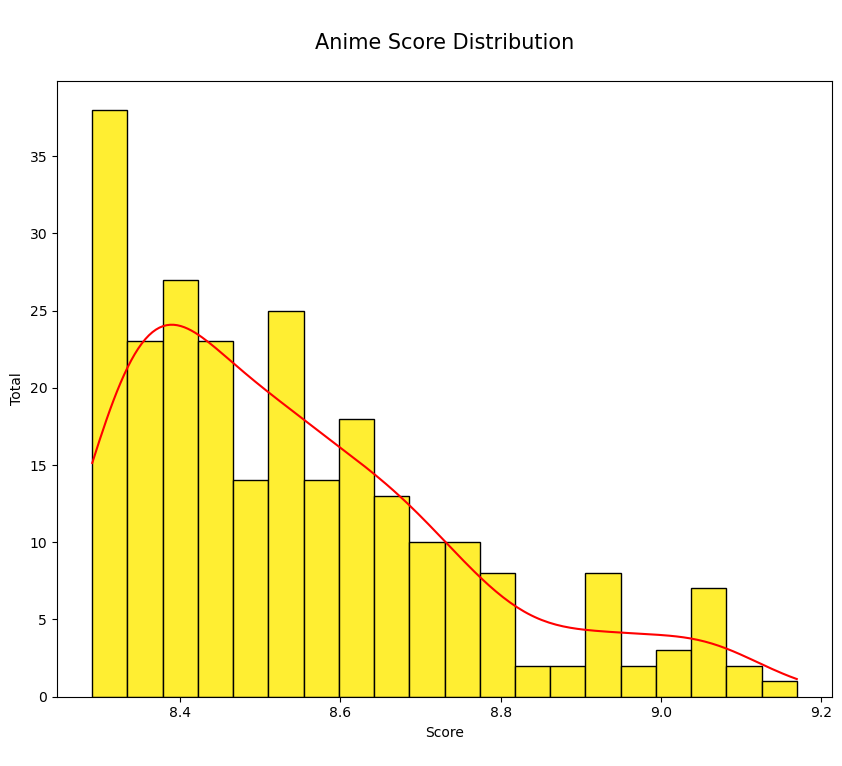

In [27]:
top_anime = df.sort_values(["Score"],ascending=False)
plt.subplots(figsize=(10,8))

ax = sns.histplot(top_anime["Score"],color="#ffee32",bins=20,alpha=1,edgecolor='black' , kde=True )
ax.lines[0].set_color('red')
plt.title("\nAnime Score Distribution\n",fontsize = 15)
plt.xlabel("Score\n", fontsize = 10)
plt.ylabel("Total", fontsize = 10)
plt.show()

* Most of the Anime ratings are spread between 8.2 - 8.5
* This distribution are right skewed

<a id="2"></a>
# <p style="padding:10px;background-color:SkyBlue;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:100">Category-wise Anime Ratings Distribution</p>

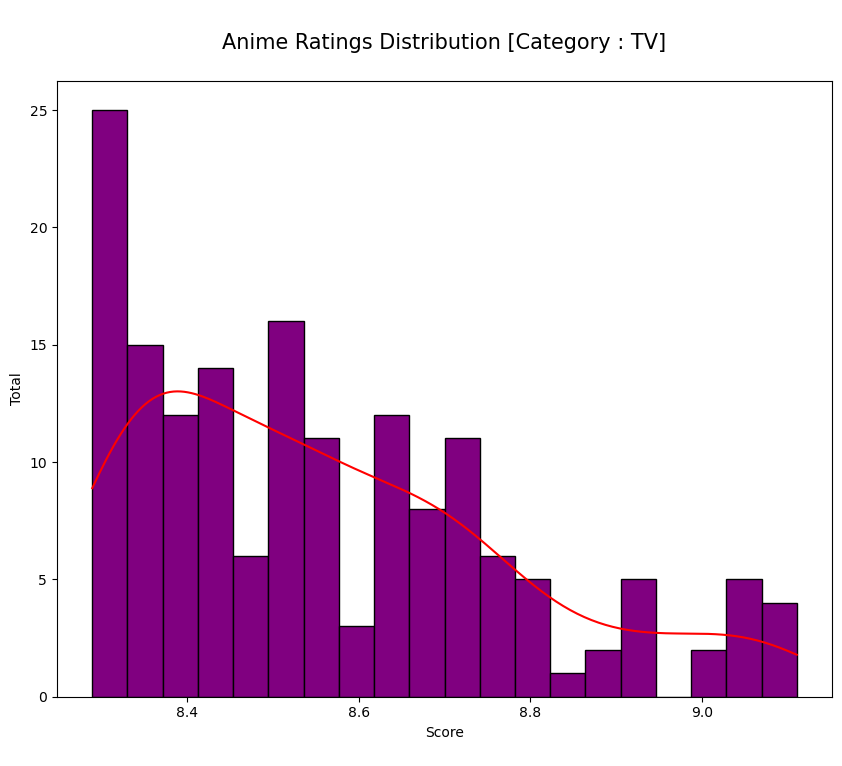

In [28]:
top_anime = df.sort_values(["Score"],ascending=False)
plt.subplots(figsize=(10,8))

ax =sns.histplot(top_anime[top_anime["Type"]=="TV"]["Score"],color="Purple",bins=20,alpha=1,edgecolor='black',kde=True )
ax.lines[0].set_color('red')
plt.title("\nAnime Ratings Distribution [Category : TV]\n",fontsize = 15)
plt.xlabel("Score\n", fontsize = 10)
plt.ylabel("Total", fontsize = 10)
plt.show()

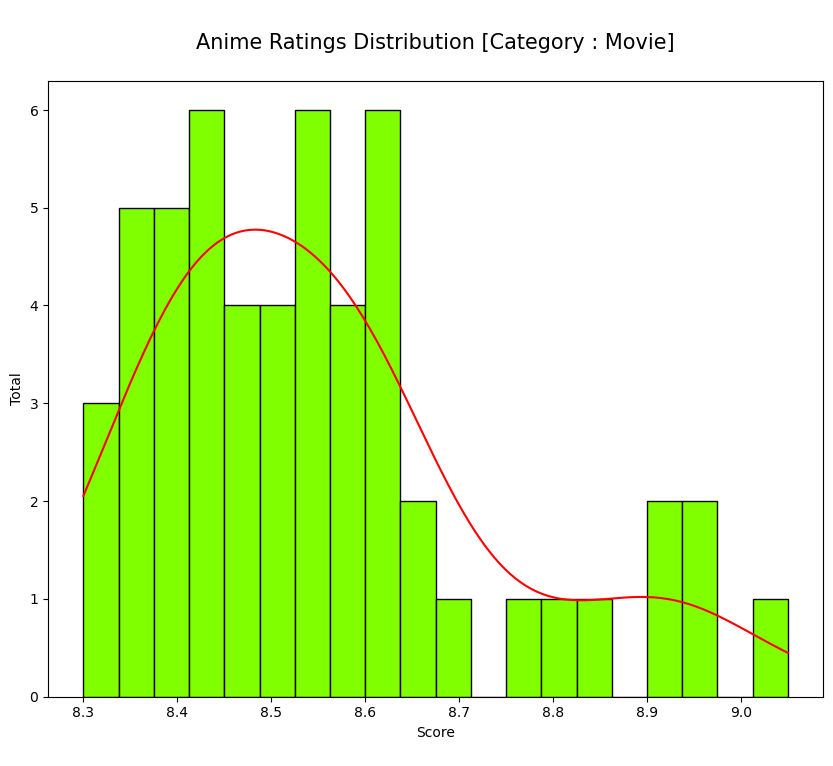

In [29]:
top_anime = df.sort_values(["Score"],ascending=False)
plt.subplots(figsize=(10,8))

ax = sns.histplot(top_anime[top_anime["Type"]=="Movie"]["Score"],color="Chartreuse",bins=20,alpha=1,edgecolor='black',kde=True )
ax.lines[0].set_color('red')
plt.title("\nAnime Ratings Distribution [Category : Movie]\n",fontsize = 15)
plt.xlabel("Score\n", fontsize = 10)
plt.ylabel("Total", fontsize = 10)
plt.show()

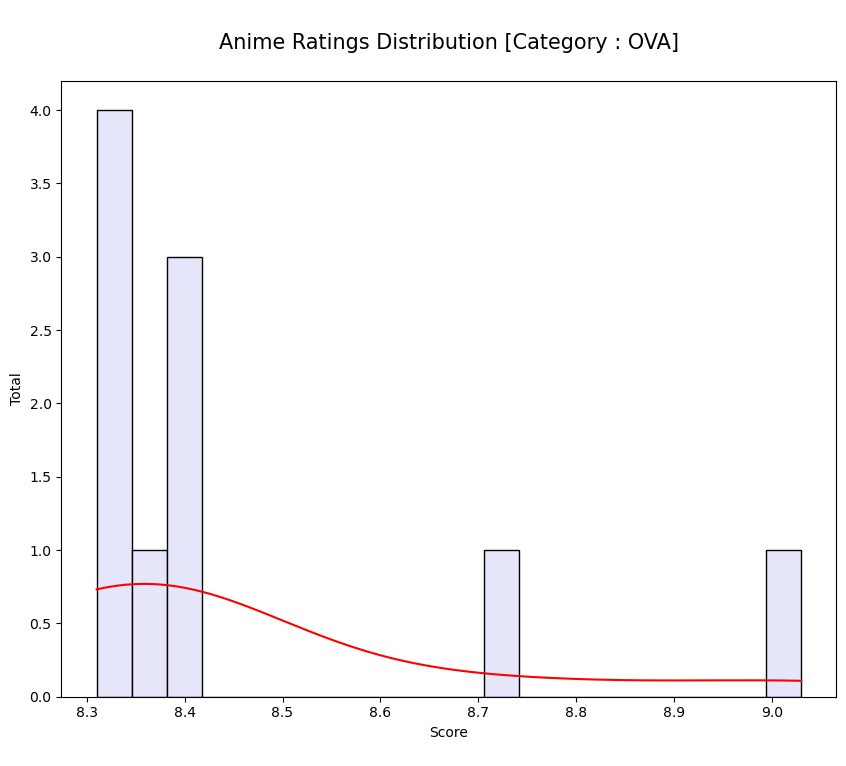

In [30]:
top_anime = df.sort_values(["Score"],ascending=False)
plt.subplots(figsize=(10,8))

ax = sns.histplot(top_anime[top_anime["Type"]=="OVA"]["Score"],color="Lavender",bins=20,alpha=1,edgecolor='black' , kde=True )
ax.lines[0].set_color('red')
plt.title("\nAnime Ratings Distribution [Category : OVA]\n",fontsize = 15)
plt.xlabel("Score\n", fontsize = 10)
plt.ylabel("Total", fontsize = 10)
plt.show()

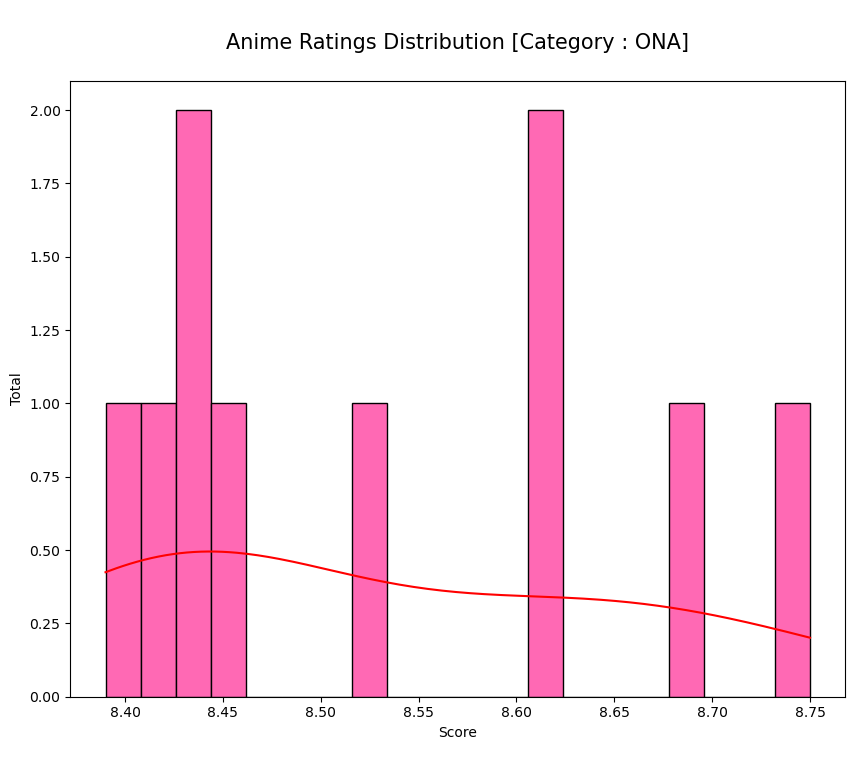

In [31]:
top_anime = df.sort_values(["Score"],ascending=False)
plt.subplots(figsize=(10,8))

ax = sns.histplot(top_anime[top_anime["Type"]=="ONA"]["Score"],color="HotPink",bins=20,alpha=1,edgecolor='black' , kde=True )
ax.lines[0].set_color('red')
plt.title("\nAnime Ratings Distribution [Category : ONA]\n",fontsize = 15)
plt.xlabel("Score\n", fontsize = 10)
plt.ylabel("Total", fontsize = 10)
plt.show()

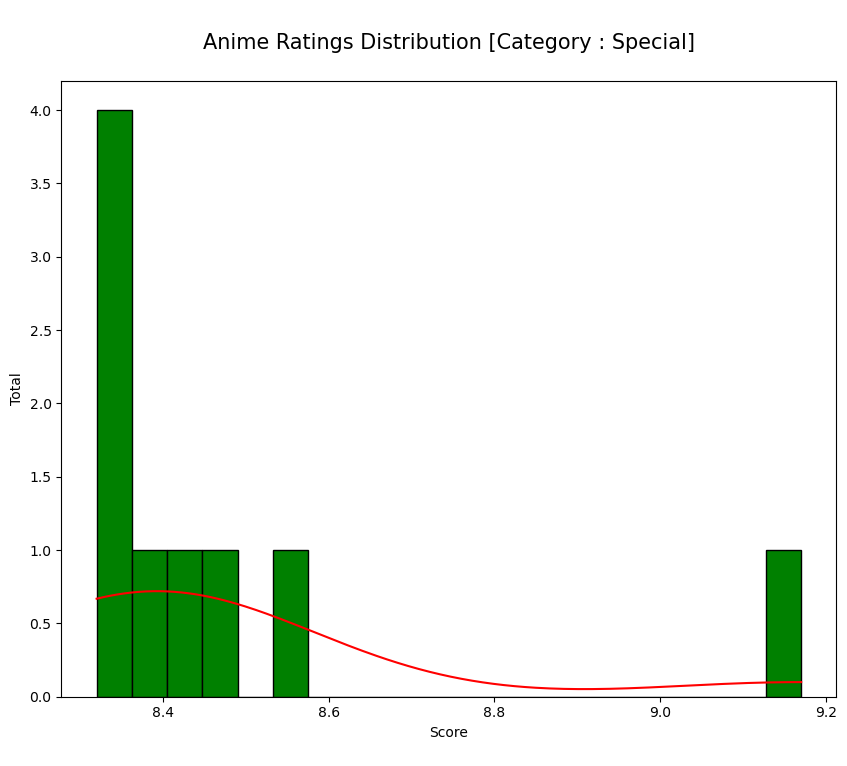

In [32]:
top_anime = df.sort_values(["Score"],ascending=False)
plt.subplots(figsize=(10,8))

ax = sns.histplot(top_anime[top_anime["Type"]=="Special"]["Score"],color="green",bins=20,alpha=1,edgecolor='black' , kde=True )
ax.lines[0].set_color('red')
plt.title("\nAnime Ratings Distribution [Category : Special]\n",fontsize = 15)
plt.xlabel("Score\n", fontsize = 10)
plt.ylabel("Total", fontsize = 10)
plt.show()

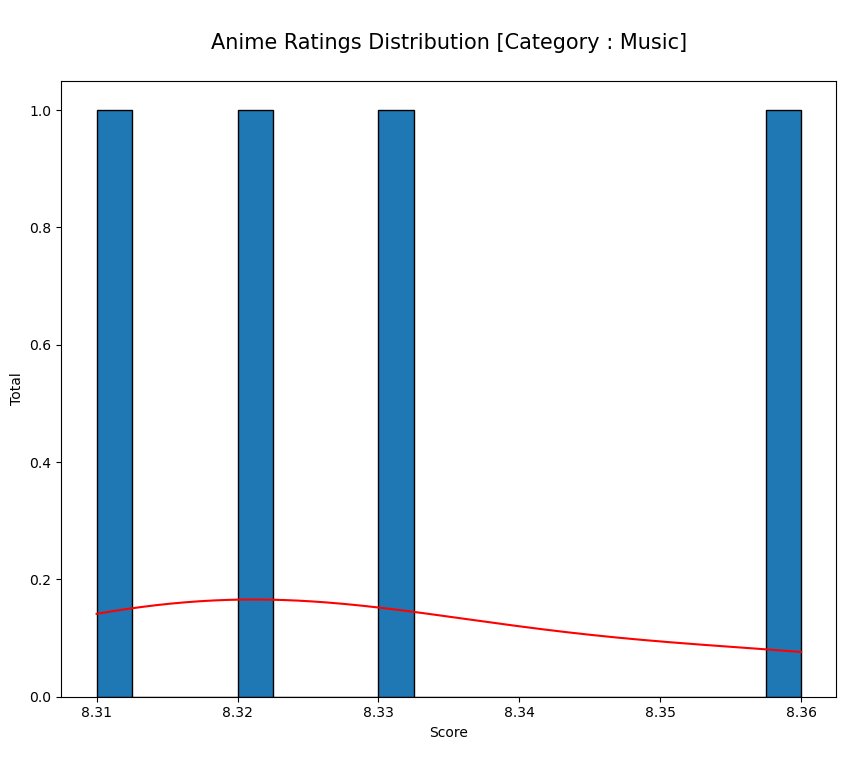

In [33]:
top_anime = df.sort_values(["Score"],ascending=False)
plt.subplots(figsize=(10,8))

ax = sns.histplot(top_anime[top_anime["Type"]=="Music"]["Score"],bins=20,alpha=1,edgecolor='black' , kde=True )
ax.lines[0].set_color('red')
plt.title("\nAnime Ratings Distribution [Category : Music]\n",fontsize = 15)
plt.xlabel("Score\n", fontsize = 10)
plt.ylabel("Total", fontsize = 10)
plt.show()

<a id="2"></a>
# <p style="padding:10px;background-color:SkyBlue;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:100">Interactions</p>

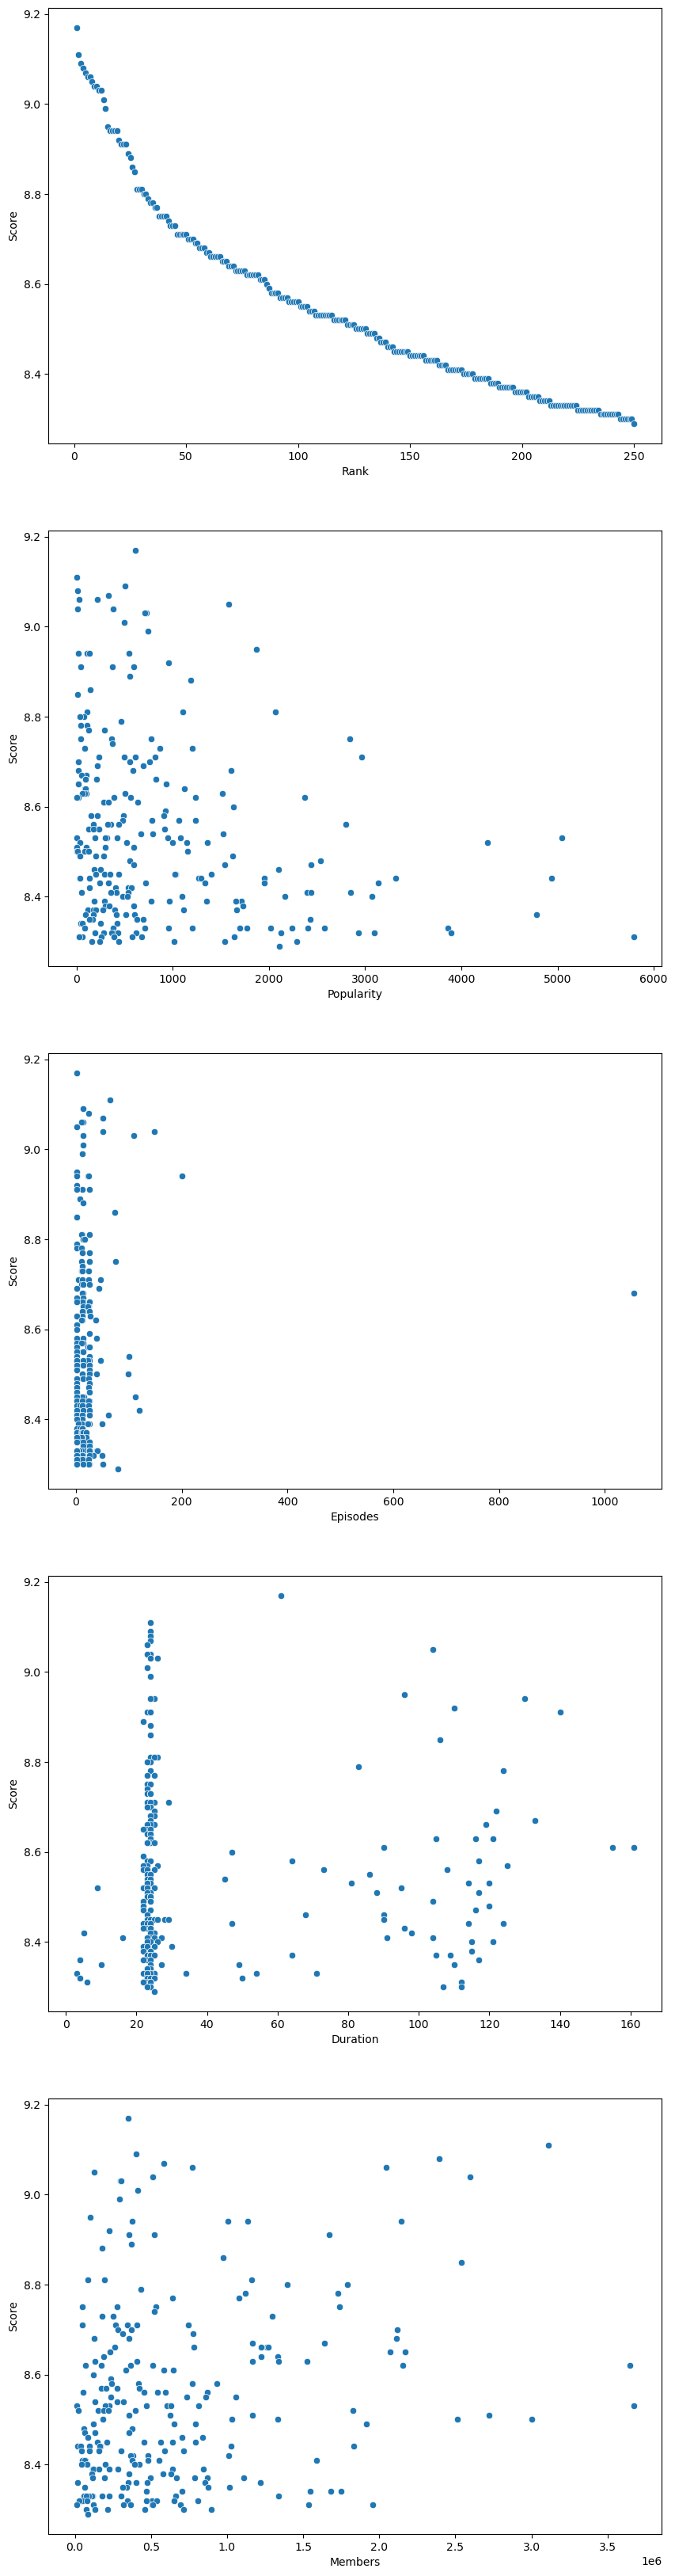

In [34]:
plt.figure( figsize=(10,50))
column_list =["Rank", "Popularity" , "Episodes" , "Duration" ,"Members"] 
for i, col in enumerate(column_list):
    plt.subplot(6,1,i+1)
    plt.subplots_adjust(hspace=0.2)
    sns.scatterplot(x=col, y='Score', data=df  )
plt.xlabel(col,fontsize = 10)
plt.ylabel('Score',fontsize = 10)
plt.show();





<a id="2"></a>
# <p style="padding:10px;background-color:Violet;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:100">Data source </p>

**https://www.kaggle.com/datasets/gianinamariapetrascu/top-250-anime-2023**

<a id="16"></a>
# <p style="padding:10px;background-color:#0f4c5c;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Thank You</p>
